In [60]:
import h5py
import sys
import numpy as np
from scipy import io
from scipy.signal import hilbert as hilbert
from math import *;

import re
import glob
import os
import matplotlib.pyplot as plt
from matplotlib import image
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.gridspec as gridspec
import argparse
import pandas

sys.path.append('C:\\Users\\vchaplin\\Documents\\HiFU\\code\\myPy')  
import stringmisc

In [5]:
BBfile='/Users\Vandiver\Data\Verasonics\sonalleve_20160709\pcdmaps20160709_BBfilt.h5'
HHfile='/Users\Vandiver\Data\Verasonics\sonalleve_20160709\pcdmaps20160709_HarmonicsFilt.h5'

h5BB = h5py.File(BBfile,'r')
h5HH = h5py.File(HHfile,'r')

# probe@/BB data is the filtered noise per acquistion. Do for the BB and Harmonics cases, take ratio

(0, 9)

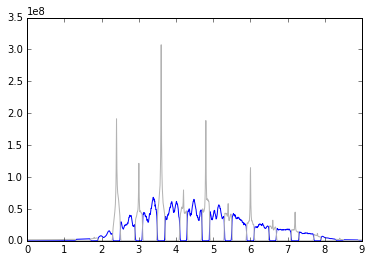

In [343]:
bbfilter=h5BB['single/single_10W/probe1/BB'].attrs['filter']
hhfilter=h5HH['single/single_10W/probe1/BB'].attrs['filter']
fx= h5HH['single/single_10W/probe1/BB'].attrs['fMHz']
endidx=h5HH['single/single_10W/probe1/BB'].attrs['endidx']
#plt.plot( fx,bbfilter,color='b')
#plt.plot( fx,hhfilter,color=(0.7,0.7,0.7))
plt.plot( fx[0:endidx], bbfilter[0:endidx]*h5BB['single/single_2W/probe1/specra'][0,:],color='b')
plt.plot( fx[0:endidx], hhfilter[0:endidx]*h5HH['single/single_2W/probe1/specra'][0,:],color=(0.7,0.7,0.7))

#plt.ylim([0,2])
plt.xlim([0,9])

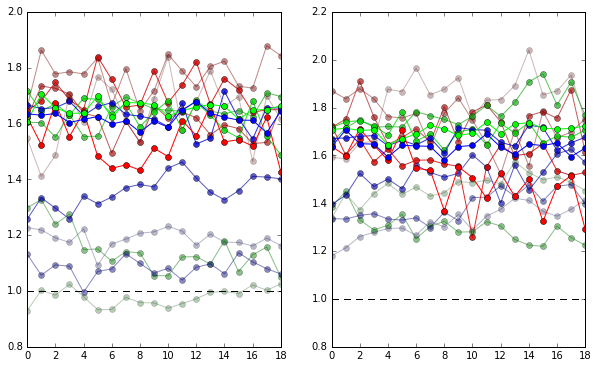

In [385]:
powers=[5,10,20,40,80]
cases=['single','multi_1','multi_2']
probes=[1,2]
def makename(case,power,probe,probestr=None):
    if probestr is None:
        probestr="probe%d"%probe
    
    return "%s/%s_%dW/%s"%(case,case,power,probestr)

# 'probe#/BB' data is the filtered noise per acquistion. Do for the BB and Harmonics cases, take ratio

ratios=[]
acqA=1; acqB=20
fig=plt.figure(figsize=(10,6))
for probe in probes:
    plt.subplot("12%d"%probe)
    for pi in range(0,len(powers)):
        for ci in range(0,len(cases)):
            extstr=makename(cases[ci],powers[pi], probe)
            ratio=h5BB[extstr+"/BB"][acqA:acqB] / h5HH[extstr+"/BB"][acqA:acqB]
            accumratio=np.mean(ratio)
            #accumratio=np.mean(h5BB[extstr+"/BB"][acqA:acqB])**2 / np.mean(h5HH[extstr+"/BB"][acqA:acqB])**2
            
            colorchan=np.mod(ci,3)
            colormag=(0.9*(pi+1.0)/len(powers) + 0.1)
            rgb=[0,0,0]
            rgb[colorchan]=colormag
            plt.plot(ratio,'-o',color=rgb,label=extstr,alpha=colormag)
            plt.plot(plt.xlim(),[1,1],'k--',label=None)
            ratios.append(dict(power=powers[pi],case=cases[ci],probe=probe,ratio=accumratio))
    
#h5BB[makename("single",5,2)+"/BB"][0:580]/h5HH[makename("single",5,2)+"/BB"][0:580]
ratio_frame=pandas.DataFrame(ratios)

In [323]:
plt_attr={}
plt_attr["single"]=dict(color=(0,0,1))
plt_attr["multi_1"]=dict(color=(0.9,0.1,0))
plt_attr["multi_2"]=dict(color=(0.5,0.5,0))

In [329]:
ratio_frame

,case,power,probe,ratio
0,single,5,1,1.460432
1,multi_1,5,1,1.129035
2,multi_2,5,1,1.301463
3,single,10,1,1.661041
4,multi_1,10,1,1.259240
5,multi_2,10,1,1.232836
6,single,20,1,1.512015
7,multi_1,20,1,1.589536
8,multi_2,20,1,1.370470
9,single,40,1,1.685980


In [383]:
pows=ratio_frame.groupby(['case','power'])

avgdf=pows.aggregate(dict(ratio=np.mean))

In [337]:
avgdf

ratio
case    power          
multi_1 5      1.286480
        10     1.240585
        20     1.731469
        40     1.688849
        80     1.653583
multi_2 5      1.315710
        10     1.274070
        20     1.478440
        40     1.676134
        80     1.604376
single  5      1.622589
        10     1.732816
        20     1.539727
        40     1.563433
        80     1.333370

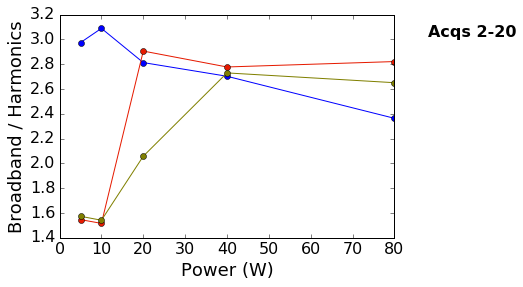

In [384]:
for case in ('single','multi_1','multi_2'):
    ff=avgdf.loc[case]
    plt.plot(ff.index,ff,'-o',label=case,**plt_attr[case])
    
plt.ylabel('Broadband / Harmonics',fontsize=18)
plt.xlabel('Power (W)',fontsize=18)
plt.gca().tick_params(labelsize=16)
plt.text(1.1,0.9,'Acqs %d-%d'%(acqA+1,acqB),transform=plt.gca().transAxes,fontsize=16, color='k',fontweight='bold')
#plt.legend()

In [302]:
avgdf.index.levels[0]

Index(['multi_1', 'multi_2', 'single'], dtype='object', name='case')

In [256]:
for g in pows:
    plt.plot(g['power'], g['ratio'],'-o',label=i[0])
    print(i)
plt.legend()

TypeError: string indices must be integers